In [1]:
## testing PER_beahvior

## rewriting scipy peaks with a library


# import stuff
import peaks #my library

import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
import os
os.listdir(os.getcwd())
import csv as csv
import json as json
import scipy as scipy
from scipy.signal import find_peaks
import h5py


##### get paths ##########
date = '20230616'
fly_id_date_code = f'b-{date[-4:]}' ##'b-0407'

#Path = 'G:/bruker vid 2023/20230407/results/'  #path to results files from read ROIs or DLC
Path = f'E:/bruker_vid_2023/{date}/results/'  #path to results files from read ROIs or DLC

SavePath = Path + 'h5_files/'
peaks.make_dirs(SavePath)


####   mostly static variables  ########
data_reducer = 100
voltage_framerate = 10000/data_reducer #frames/s # 1frame/.1ms * 1000ms/1s = 10000f/s
#with reducer i get 1 frame for every .1 * 100 ms => frame/.1*100 ms * 1000ms/s = 100f/s
#each "frame" is 0.1ms
video_framerate = 200 #f/s
video_framerate = 38.02
#video_framerate_downstairs = 33

In [2]:





#

files = os.listdir(Path)
voltage_files = peaks.check_for_voltage_file(Path)
roi_files = peaks.check_for_results_file(Path)

##look at voltage and roi files and add data to h5 file based on fly#
if roi_files is not None:
    for roi_file in roi_files:
        fly_number = peaks.find_fly_number(roi_file)
        h5_filename = f'{date}_fly_number_{fly_number}_.h5'
        h5_Path = os.path.join(SavePath, h5_filename)
        data = peaks.import_roi_results(os.path.join(Path, roi_file))
        peaks.add_to_h5(h5_Path, 'roi data', data)
        if peaks.check_for_key(h5_Path, 'fly-id') == False:
            fly_id = f'{fly_id_date_code}-{fly_number}'
            peaks.add_to_h5(h5_Path, 'fly-id', fly_id)
        

if voltage_files is not None:
    for voltage_file in voltage_files:
        fly_number = peaks.find_fly_number(roi_file)
        h5_filename = f'{date}_fly_number_{fly_number}_.h5'
        h5_Path = os.path.join(SavePath, h5_filename)
        data = peaks.import_voltage_data(os.path.join(Path, roi_file))
        peaks.add_to_h5(h5_Path, 'voltage data', data)
        if peaks.check_for_key(h5_Path, 'fly-id') == False:
            fly_id = f'{fly_id_date_code}-{fly_number}'
            peaks.add_to_h5(h5_Path, 'fly-id', fly_id)


#set framerate
 # **!!  change so code just asks is voltage framerate or video framerate needed


#set interval time
##since most of my experiments are switch do I need this?
interval_time = None ##decide if I should change this later

#set fly numbers 
# #(should be set when import data)


#get peaks for light and PER
##look at every flies h5 file and open and run peaks 
#    (note: some light data may be in roi file)
#  if there is more than one mean in the data then it will return a list of list of peaks for each mean





##make plots








#smooth PER peaks 






#find onset of PER peaks



#find indiv






#

Caution: this does not contain 'Voltage', make sure it's the right file
Caution: this does not contain 'Voltage', make sure it's the right file
Caution: this does not contain 'Voltage', make sure it's the right file


In [3]:
video_framerate = 38.02
h5files = [file for file in os.listdir(SavePath) if '.h5' in file]

for fly in h5files:
    each_path = os.path.join(SavePath, fly)
    with h5py.File(each_path, 'a') as f:
        print(f.keys())
        print(f['fly-id'][()])
        if 'roi data' in f.keys():
            roi_data = f['roi data'][()]
            # print(roi_data[0:10])
            # print(roi_data[0][0])
            if 'Mean' in str(roi_data[0][0]):
                print(True)
            #print(peaks.is_column_mean(roi_data, 0, 0))
            print(np.shape(roi_data))
            data_peaks, properties, columns = peaks.get_peaks(roi_data, each_path, video_framerate, prominence = .3)
            # print(properties)
            # print(properties['left_bases'])
            peaks.add_to_h5(each_path, 'roi peak left bases', properties['left_bases'])
            plt.scatter(data_peaks[0], np.ones(len(data_peaks[0])))
            plt.plot(columns)
            plt.show()
        if 'voltage data' in f.keys():
            voltage_data = f['voltage data'][()]
            voltage_peaks, voltage_properties, voltage_columns = peaks.get_peaks(voltage_data, each_path, voltage_framerate)


<KeysViewHDF5 ['PER peaks', 'PER peaks sec', 'fly-id', 'roi data', 'roi peak left bases', 'roi peak prominences', 'video framerate']>
b'b-0616-2'
True
(200652, 1)
titles are [array([b'Mean(PER_fly2)'], dtype='|S14')]
PER


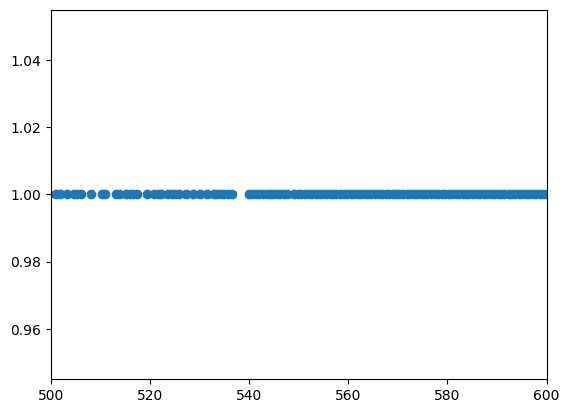

[[1.44660705e+00 2.15675960e+00 3.57706470e+00 ... 4.78035245e+03
  4.78111520e+03 4.78527091e+03]]
(5201,)
(1, 182079)
[17.72691611 17.70549185 17.73657212 17.72933011 17.72661436 18.7039831
 19.42033796 19.35606518 19.64182257 19.7996379 ]
182079


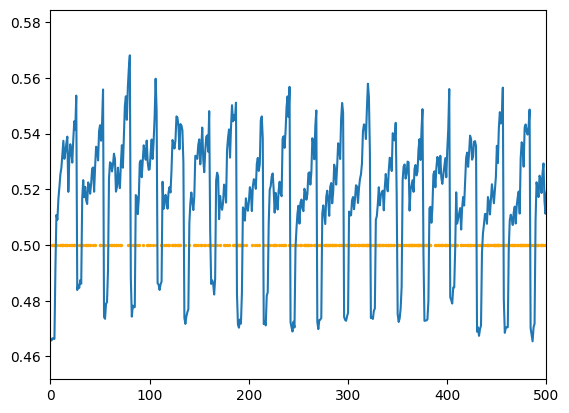

In [6]:
video_framerate = 38.02
framerate = 38.02

## get peaks per second rather than frames
data_peaks_sec = np.array(data_peaks) / video_framerate ##rois will always be retrieved from video
#voltage_peaks_sec = np.array(voltage_peaks) / voltage_framerate #voltage will always have the same framerate

#plt.plot(data_peaks_sec[0])
plt.scatter(data_peaks_sec[0], np.ones(len(data_peaks_sec[0])))
plt.xlim(500,600)
plt.show()
print(data_peaks_sec)
print(np.shape(data_peaks_sec[0]))

print(np.shape(columns))
print(columns[0][0:10])
print(len(columns[0]))
plt.plot(columns[0][0:5000]/framerate)
plt.scatter(data_peaks_sec[0][0:5000], np.ones(len(data_peaks_sec[0][0:5000]))*.5, color = 'orange', s = 2)
plt.xlim(0,500)
plt.show()


# ##find peak onsets

# PER_onsets_matrix_sec = get_onsets_matrix(PER_peaks_sec, data, PER_columns, identifier = 'PER')
# light_onsets_matrix_sec = get_onsets_matrix(light_peaks_sec, light_data[data_index], light_columns, identifier = 'light')
# light_onset_indices = light_peak_properties['left_bases']
# PER_onset_indices = PER_peak_properties['left_bases']

In [ ]:
h5files = [file for file in os.listdir(SavePath) if '.h5' in file]

for fly in h5files:
    each_path = os.path.join(SavePath, fly)
    with h5py.File(each_path, 'a') as f:
        print(f.keys())
        onsets = np.array(f['roi peak left bases'])
        framerate = f['video framerate'][()]
        onsets_sec = onsets / framerate
        plt.scatter(onsets_sec, np.ones(len(onsets_sec)))
        data = f['roi data'][()]
        print(type(data))
        #data = np.frombuffer(data, dtype = np.float64)
        print(np.shape(data))
        plt.show()
        plt.plot(range(len(data[1:,0]))* framerate, data[1:,0])
        #plt.plot(f['roi data'][0:200])
        plt.title(f"{f['fly-id'][()]} onsets")
        plt.xlim(0,200)
        plt.show()
        print(f['roi data'][0:500])
        


In [ ]:
# print(data)
# plt.plot(data)
print(np.shape(data))
print(type(data))
print(type(data[0]))
print(data[0:10])
plot_data = data[1:500,0]
# print(type(data[1][0]))
# print(data[1][0])
plt.plot(range(len(plot_data))/framerate, plot_data)
plt.plot()
#print(data[1:,0])
plt.show()

In [ ]:
print(plot_data[0:50])
print(plot_data[-50:-1])

#plt.plot(plot_data[-50:-1])
start = 300
stop = 1000
for point_i in range(len(plot_data[start:stop])):
    point = plot_data[start:stop][point_i]
    plt.scatter(point_i*framerate, point, s= 1, color = 'k')
    